In [11]:
# Importing the Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Importing the datset
#from google.colab import files
#upload = files.upload()

In [13]:
#import io
#df = pd.read_csv(io.BytesIO(upload['housingData-Real.csv']))  # Dataset is now stored in a Pandas Dataframe
df = pd.read_csv('housingData-Real.csv')

In [14]:
#To check the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
#getting information of the dataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
#selecting specific columns from dataset
livingSpace = df['sqft_living'] # Independent Variable 
price = df['price'] # Dependent Variable

In [17]:
#converting livingSpace into 2D array
X = np.array(livingSpace).reshape(-1, 1)

In [18]:
X #Independent variable - LivingSpace

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [19]:
#converting price into 1D array
y = np.array(price)

In [20]:
y  # Dependent variable - Price

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [21]:
#convert the dataSet into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2)

In [22]:
#passing dataSet into Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #Regressor is an object of Linear Regression.
regressor.fit(X_train, y_train) #To train the data. After training the model, we can predict the data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#create a predictor to predict the values.
predictor  = regressor.predict(X_test)

In [24]:
predictor

array([267391.63104289, 475458.5797588 , 578066.93802965, ...,
       464057.65106203, 726279.01108756, 398502.31105565])

# Plotting the Graph

Text(0, 0.5, 'Price')

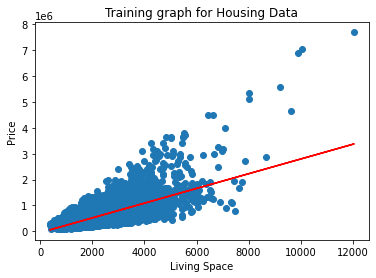

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Training graph for Housing Data')
plt.xlabel('Living Space')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

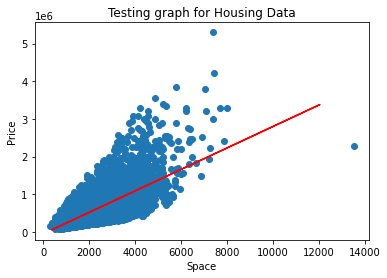

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Testing graph for Housing Data')
plt.xlabel('Space')
plt.ylabel('Price')

## Calcualting the Accuracy of the model.

In [28]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

48.827544481239855 %
